# Multivariable Linear Regression Notebook
------------------------------------
Dataset is kc_house_data.csv

This dataset contains prices of houses based on many parameters like number of bedrooms, bathrooms, size of house, floor...etc.

We will choose only two parameters of these paramters in the notebook to be able to visualize the model, but you can build it based on all parameters in same manner.

N.B. if you tried to read the csv using


```
data = pd.read_csv('Data/kc_house_data.csv')
```
 you will get an error due to some data having quotation marks which causes an error in pandas reading it. 

To solve the bug, we will import a library called *csv* and read the data as 
```
data = pd.read_csv('Data/kc_house_data.csv', quoting=csv.QUOTE_NONE)
```


## Part One: Prepare Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('Data/kc_house_data.csv', quoting=csv.QUOTE_NONE)
# This function drops any rows with None in any of the columns
# we do this because it will cause us problems in modelling
# we don't know if the data has Null values or not, but we do it as a precaution
data = data.dropna()
# this drops column with the given name
# if you gave it param 0 instead of 1, it will drop rows and not columns
data = data.drop('zipcode', 1)
data[0:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,"""7129300520""","""20141013T000000""",221900.0,3,1.00,1180,5650,"""1""",0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,"""6414100192""","""20141209T000000""",538000.0,3,2.25,2570,7242,"""2""",0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,"""5631500400""","""20150225T000000""",180000.0,2,1.00,770,10000,"""1""",0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,"""2487200875""","""20141209T000000""",604000.0,4,3.00,1960,5000,"""1""",0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,"""1954400510""","""20150218T000000""",510000.0,3,2.00,1680,8080,"""1""",0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [4]:
# this line is advanced than the currecnt level, so you can ignore it
# but what is does is fixing the floors column to have float values instead of string "number" as shown above
# if you are curious to understand, google "lambda functions python"
# it just applies the lambda function I defined on floors column
data['floors'] = data.floors.apply(lambda x: float(x[1:-1]))

In [5]:
# Seperatins Xs and Y
Y = data['price']
# this chooses all data in columns from bedrooms to sqft_lot15 from data
Xs = data.loc[:, 'bedrooms':'sqft_lot15']
print(Y.shape)
print(Y[0:5])
print(Xs.shape)
print(Xs[0:5])

(21613,)
0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64
(21613, 17)
   bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0         3       1.00         1180  ... -122.257           1340        5650
1         3       2.25         2570  ... -122.319           1690        7639
2         2       1.00          770  ... -122.233           2720        8062
3         4       3.00         1960  ... -122.393           1360        5000
4         3       2.00         1680  ... -122.045           1800        7503

[5 rows x 17 columns]


Since we have 18 paramaters and we only want two, we will choose the 2 with highest correlation coefficient with Y

In [6]:
# loop on all X columns, and calc. R_value and store it in an array
X_names = Xs.columns
# print(X_names)
r_vals = []
for x_name in X_names:
  # print('Parameter name:', x_name)
  x = Xs.loc[:, x_name]
  r_val = np.corrcoef(x, Y)[0,1]
  # print('R value between', x_name, 'and Y =', r_val)
  r_vals.append(r_val)

In [7]:
# This function will get the indices of the max 2 values in r_values
# these indices are equivalent to the indices of the parameters in X with the highest r_values
indices = np.argpartition(r_vals, -2)[-2:]
print(indices)
X1 = Xs.iloc[:,indices[0]]
X1_name = X_names[indices[0]]
X2 = Xs.iloc[:,indices[1]]
X2_name = X_names[indices[1]]
print('Chosen parameters are:', X1_name, 'and', X2_name)

[8 2]
Chosen parameters are: grade and sqft_living


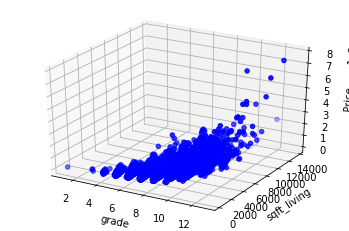

In [8]:
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y, color='blue')
ax.set_xlabel(X1_name)
ax.set_ylabel(X2_name)
ax.set_zlabel('Price')
plt.show()

## Part Two: Linear Regression Model

Now we have two variables X1, and X2.

Our Linear Regression Model is Y = a0 + a1 * X1 + a2 * X2

In [9]:
X12 = data[[X1_name, X2_name]]
linear_reg_model = LinearRegression()
linear_reg_model = linear_reg_model.fit(X12, Y)

In [10]:
a0, a1, a2 = linear_reg_model.intercept_, linear_reg_model.coef_[0], linear_reg_model.coef_[1]
print('Function is: Y = %.2f + %.2f * X1 + %.2f * X2' % (a0, a1, a2))

Function is: Y = -598108.99 + 98554.80 * X1 + 184.42 * X2


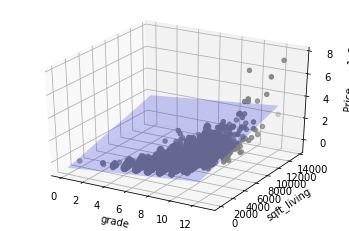

In [19]:
Ypred = linear_reg_model.predict(X12)
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y, color='gray')
ax.set_xlabel(X1_name)
ax.set_ylabel(X2_name)
ax.set_zlabel('Price')
XX1, XX2 = np.meshgrid(range(max(X1)), range(max(X2)))
YY = a0 + a1 * XX1 + a2 * XX2
ax.plot_surface(XX1, XX2, YY, color='blue', alpha=0.2)
plt.show()